# **WebScraping_and_wordcloud_news**


In [3]:
!pip install wordcloud
!pip install nltk
!pip install feedparser

#Criando função webscrapping de rss de notícias
def wordcloudnews_rss (x):
  '''Inserir  URL RSS entre aspas
  A saída lhe exporta uma wordcloud.png e um arquivo csv com as palavras e sua respectivas frequencias'''
  
  import pandas as pd
  import feedparser as ps
  import nltk 
  import wordcloud 
  nltk.download('popular', quiet=True) #Download dos pack de palavras
  #nltk.download('punkt') #download pack

  _x = ps.parse(x)


  #Selecionando Title _x
  news_title_x=[]
  for post in _x.entries:
    news_title_x.append(post['title'])

  #Bag Of Words
  #Separando em palavras x
  from nltk import word_tokenize
  text_x=''
  for n in news_title_x:
      text_x=text_x+n.lower()
  token_x=word_tokenize(text_x)
  



  #Stop Words x
  #Retirando palavras sem importância
  from nltk.corpus import stopwords
  stop_words = list(stopwords.words('english')) #lista das stop words
  #Loop para gerar lista sem as stop words
  token_x_stop_filter=[]
  for t in token_x:
      if t in stop_words:
          continue
      else:
          token_x_stop_filter.append(t)
  

  #Stemming x
  #Diminuindo para os radicais de cada palavra
  from nltk.stem import PorterStemmer
  pst = PorterStemmer()
  token_x_stop_stem_filter=[]
  for s in token_x_stop_filter:
      token_x_stop_stem_filter.append(pst.stem(s))

  

  #CNN - Filtro de pontuação e palavras com dois caracteres
  token_x_stop_stem_punctuation_filter=[]
  for t in token_x_stop_stem_filter:
      if len(t)<3:
          continue
      else:
          token_x_stop_stem_punctuation_filter.append(t)
  bagofwords=token_x_stop_stem_punctuation_filter

  #TF
  from nltk.probability import FreqDist
  fdist = FreqDist(bagofwords)
  wordsandfreq=dict(fdist)

  #df word and freq to csv
  serie_words=pd.DataFrame(columns=['word','freq'])
  serie_words['word']=wordsandfreq.keys()
  serie_words['freq']=wordsandfreq.values()
  forexternal=serie_words.sort_values(['freq'],ascending=False).reset_index(drop=True)
  forexternal.to_csv('forexternal.csv',index=False)

  #bagofwordslist to text
  text=''
  for t in bagofwords:
    text=text+' '+t

  #Gerando nuvem de palavras  
  from wordcloud import WordCloud
  wordcloud=WordCloud().generate_from_text(text)
  wordcloud.to_file("news_wordcloud.png")
  from PIL import Image

  # creating a object
  im = Image.open('news_wordcloud.png')
  return im



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=153b5cbb9eb196a057de961d13dcc5555f01d2dc71c484520d5da5fb33826911
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built sgmllib3k


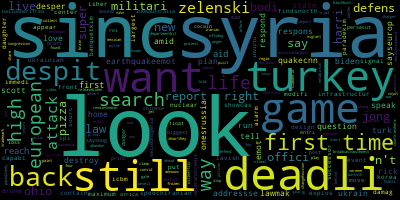

In [4]:
wordcloudnews_rss('http://rss.cnn.com/rss/edition.rss')